<font color='red'><h1> Region Based Segmentation </h1></font>

### This workbook is the python implementation of region based segmentation, in this method the 'seed point(s)' is(are) choosen, the pixels near seed point having gray value less than threshold are segmented.

Importing libraries

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.color import rgb2gray
import scipy.ndimage as ndi
from skimage import morphology
from skimage.segmentation import felzenszwalb
from skimage import color
from skimage import io

Input images

In [96]:
def region_growing_segmentation(gray_image, seed):
    
    # Initialize the segmentation mask
    height, width = gray_image.shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)

    # Define a threshold for region growing
    threshold = 20

    # Define a function to check similarity criteria
    def check_similarity(current_pixel, seed_pixel):
        return abs(int(current_pixel) - int(seed_pixel)) < threshold

    # Initialize the seed point
    seed_x, seed_y = seed
    seed_value = gray_image[seed_y, seed_x]

    # Create a stack to keep track of pixels to be processed
    stack = [(seed_x, seed_y)]

    # Region growing loop
    while stack:
        current_x, current_y = stack.pop()

        # Check if the current pixel is within the image boundaries
        if 0 <= current_x < width and 0 <= current_y < height:
            # Check if the current pixel is not yet visited and satisfies the similarity criteria
            if mask[current_y, current_x] == 0 and check_similarity(gray_image[current_y, current_x], seed_value):
                # Add the current pixel to the region
                mask[current_y, current_x] = 255

                # Add neighboring pixels to the stack for processing
                stack.extend([(current_x + dx, current_y + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1]])

    return mask

In [97]:
# Read the input image
img = cv2.imread('images/5.bmp')
img = rgb2gray(img)
img = np.uint8(cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX))

In [105]:
# Choose a seed point (you may need to adjust this based on your image)
seed_point = (300, 100)

# Perform region growing segmentation
segmentation_mask = region_growing_segmentation(img, seed_point)

# Overlay the segmentation mask on the original image
segmented_image = cv2.bitwise_and(img, img, mask=segmentation_mask)

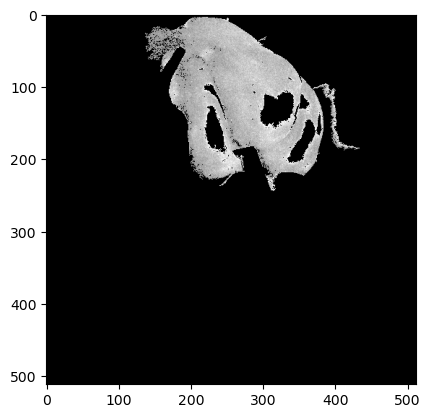

In [106]:
plt.imshow(segmented_image, cmap='gray')

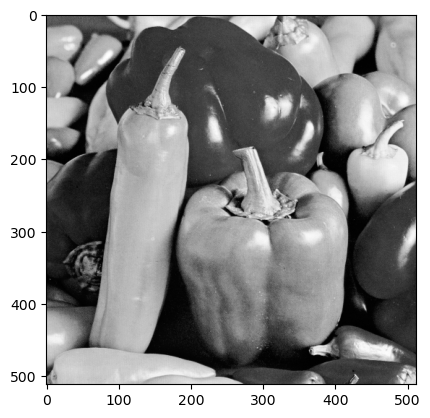

In [100]:
plt.imshow(img, cmap='gray')